## Install Library

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install statsmodels
!pip install pmdarima
!pip install python-math

## Import Library & Dataset 

In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA, ARMA
import statsmodels
import statsmodels.api as sm
import pmdarima
from math import sqrt

In [451]:
df=pd.read_csv('Global_Superstore2.csv', encoding= 'unicode_escape')

## Preprocessing

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [452]:
#take 3 columns required
df=df.iloc[:,[2,19,18]]

#drop nan value
df.dropna(inplace=True)
df.isnull().sum()

#rename column 
df.rename(columns={'Order Date':'date','Quantity':'qty','Sales':'price'},inplace=True)

#cleaning negative and null value from qty and 
df=df[(df.qty>0)&(df.price>0)]

In [454]:
# convert object to datetime
df['date'] = pd.to_datetime(df.loc[:, 'date'], format='%d-%m-%Y')

# cek min max date
print("Minimum date: {}, Maximum date: {}".format(df["date"].min(),df["date"].max()))

Minimum date: 2011-01-01 00:00:00, Maximum date: 2014-12-31 00:00:00


In [458]:
df.sort_values(by='date',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

# drop negative values
df = df.loc[(df[['qty', 'price']] > 0).all(axis=1)]

# check df data size
df.shape

(51290, 3)

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'qty'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'price_total'}>]], dtype=object)

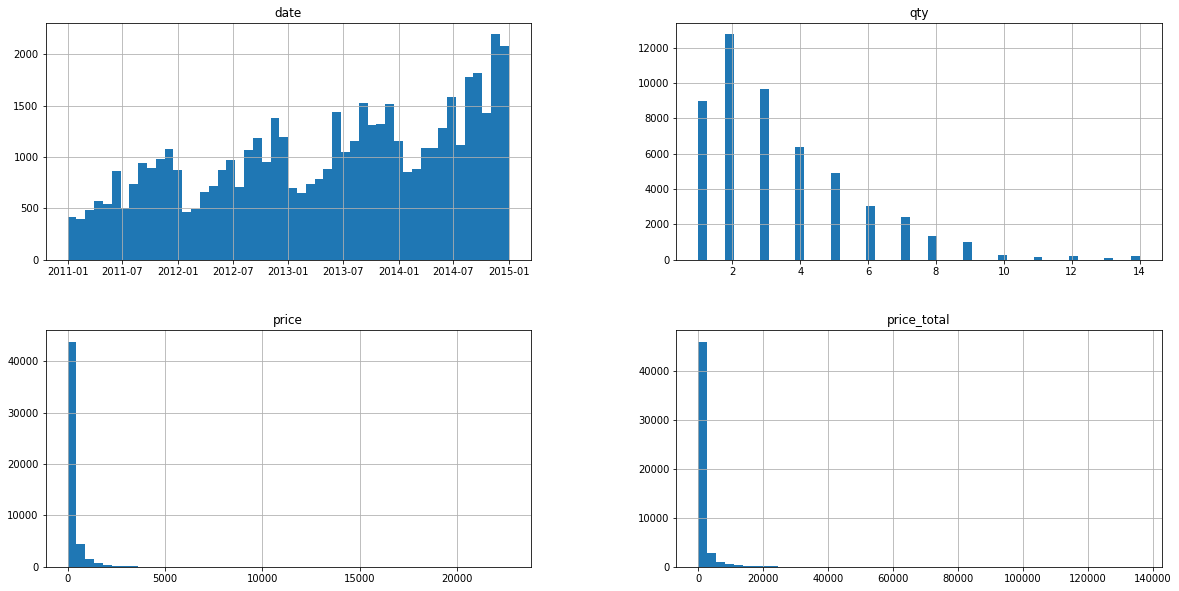

In [459]:
#calculate price total each row
df['price_total']=df.qty*df.price

#plot graph distribution plot
df.hist(bins=50,figsize=(20,10))

In [460]:
#remove column quantity and unit price
df.drop(['qty','price'],axis=1,inplace=True)
df

,date,price_total
0,2011-01-01,264.480
1,2011-01-01,361.098
2,2011-01-01,816.600
3,2011-01-01,110.484
4,2011-01-01,134.595
...,...,...
51285,2014-12-31,1292.544
51286,2014-12-31,30.000
51287,2014-12-31,322.515
51288,2014-12-31,247.896


In [461]:
# aggregate to get daily gmv
df_daily_gmv = df.groupby('date').aggregate('sum').reset_index().sort_values(by='date')

# get weekly gmv
df['weekly_gmv'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
df_weekly_gmv = df.groupby([pd.Grouper(key='weekly_gmv', freq='W')]).aggregate('sum').reset_index().sort_values(by='weekly_gmv')

# get monthly gmv
df_monthly_gmv = df.groupby([pd.Grouper(key='date', freq='M')]).aggregate('sum').reset_index()

In [462]:
df_monthly_gmv

,date,price_total
0,2011-01-31,4.567776e+05
1,2011-02-28,4.860850e+05
2,2011-03-31,7.201055e+05
3,2011-04-30,5.699763e+05
4,2011-05-31,7.444816e+05
5,2011-06-30,1.011596e+06
6,2011-07-31,5.343839e+05
7,2011-08-31,1.066877e+06
8,2011-09-30,1.459914e+06
9,2011-10-31,9.453673e+05


## Plot Data

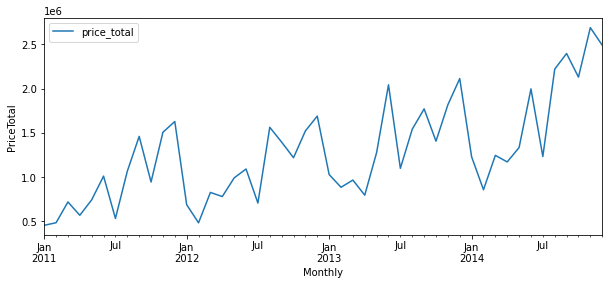

In [463]:
data=df_monthly_gmv.copy()
data.reset_index(drop=True,inplace=True)
data.set_index(['date'], inplace=True)
data.plot(figsize=(10,4))
plt.ylabel('PriceTotal')
plt.xlabel('Monthly')
plt.show()

In [464]:
#check stationarity data with ADF test
a = adfuller(data.price_total)[1]
d = 0
if a > 0.05:
    print(f'P-value diff {d} = {a}')
    b = data.price_total
    while a > 0.05:
        b = b.diff()
        a = adfuller(b.dropna())[1]
        d = d+1
        print(f'P-value diff {d} = {a}')
else:
    print('No Differencing')

P-value diff 0 = 0.9858609084564428
P-value diff 1 = 1.305419276579403e-10


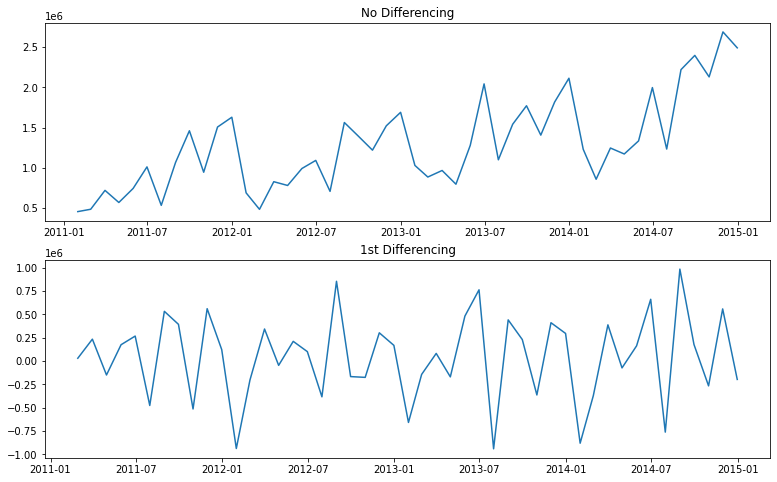

In [465]:
f=plt.figure(figsize=(13,8))
ax1=f.add_subplot(211)
ax1.set_title('No Differencing')
ax1.plot(data.price_total)

ax1=f.add_subplot(212)
ax1.set_title('1st Differencing')
ax1.plot(data.price_total.diff().dropna())

plt.show()

C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


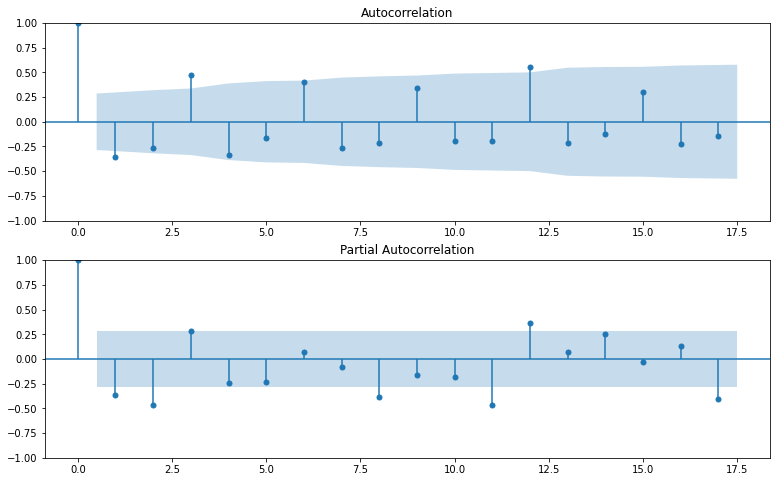

In [466]:
# plot ACF & PACF with 3rd differencing data
f=plt.figure(figsize=(13,8))
ax2=f.add_subplot(211)
plot_acf(data.price_total.diff().dropna(),ax=ax2)

ax3=f.add_subplot(212)
plot_pacf(data.price_total.diff().dropna(),ax=ax3)
plt.show()

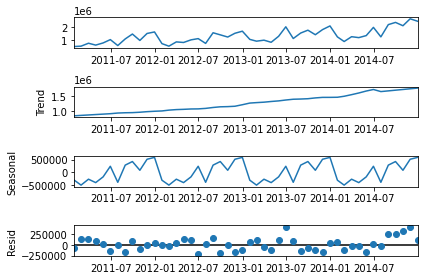

In [467]:
#decompose timeseries graph
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

## Training ARIMA Model

In [469]:
#find best order model from AIC 
autoModel = pmdarima.auto_arima(data.price_total, D=d, trace=True,test='adf', start_P=0, start_Q=0, 
                                max_P=7, max_Q=7,error_action='ignore',m=12, 
                                suppress_warnings=True, seasonal=True)
autoModel.fit(data.price_total)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=984.613, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=975.517, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=977.605, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=984.363, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=977.086, Time=0.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=977.233, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=978.023, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=978.578, Time=0.65 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=972.441, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=974.533, Time=0.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=975.702, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=976.550, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=976.969, Time=0.49 sec
 ARIMA(0,1,1)(1,1,0)[12]             

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [472]:
#train data with SARIMAX
arima_model = statsmodels.tsa.statespace.sarimax.SARIMAX(data.price_total,order=(autoModel.order),
                                                         seasonal_order=(autoModel.seasonal_order))
model = arima_model.fit()
model.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        price_total   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -484.221
Date:                            Sat, 11 Mar 2023   AIC                            972.441
Time:                                    13:41:43   BIC                            975.552
Sample:                                01-31-2011   HQIC                           973.515
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4039      0.096     -4.209      0.000      -0.592      -0.216
sigma2      5.715e+10    6.7e-15   8.54e+24      0.000    5.71e+10    5.71e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.66   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.10   Prob(JB):                         0.92
Heteroskedasticity (H):               0.82   Skew:                             0.16
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

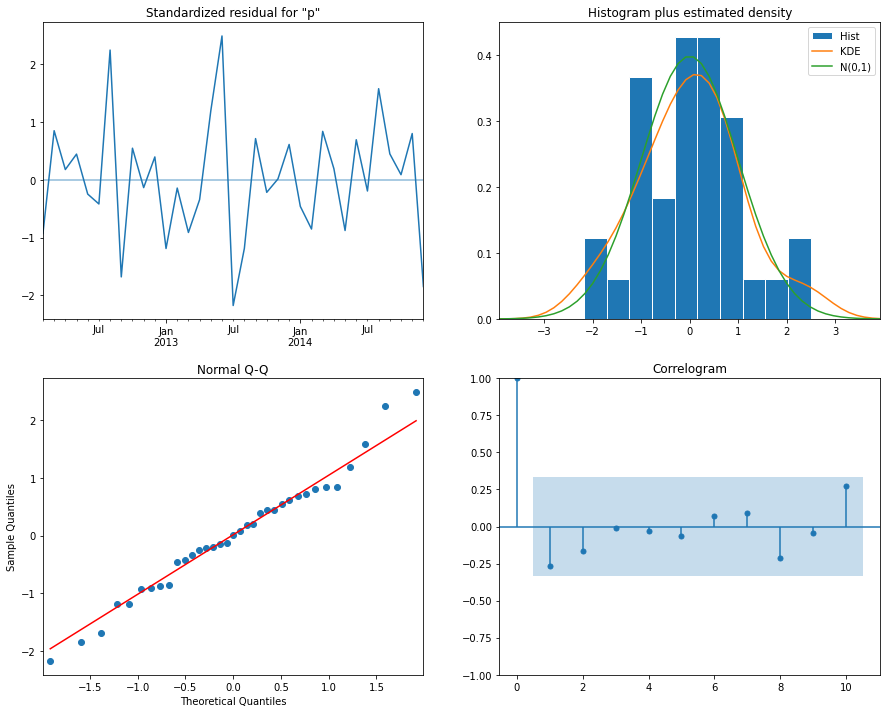

In [473]:
#plot diagnostic
model.plot_diagnostics(figsize=(15,12))
plt.show()

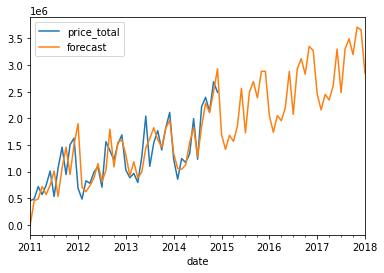

In [474]:
#plot data actual, predict and forecast
fig, ax = plt.subplots()
ax = data.plot(ax=ax)
plot_predict(model,'2011','2018',ax=ax,
             alpha=None, dynamic=False)
plt.show()

In [449]:
#show actual data and predict in dataframe
pd.concat([data,pd.DataFrame(model.predict())],axis=1,join='inner')

,price_total,predicted_mean
2011-01-31,4.567776e+05,0.000000e+00
2011-02-28,4.860850e+05,4.567776e+05
2011-03-31,7.201055e+05,4.860850e+05
2011-04-30,5.699763e+05,7.201055e+05
2011-05-31,7.444816e+05,5.699763e+05
2011-06-30,1.011596e+06,7.444816e+05
2011-07-31,5.343839e+05,1.011596e+06
2011-08-31,1.066877e+06,5.343839e+05
2011-09-30,1.459914e+06,1.066877e+06
2011-10-31,9.453673e+05,1.459914e+06


In [475]:
#show data forecasting for next 12 month
autoModel.predict(12)

2015-01-31    1.697072e+06
2015-02-28    1.417246e+06
2015-03-31    1.681064e+06
2015-04-30    1.568094e+06
2015-05-31    1.859465e+06
2015-06-30    2.562098e+06
2015-07-31    1.727012e+06
2015-08-31    2.492300e+06
2015-09-30    2.690520e+06
2015-10-31    2.384371e+06
2015-11-30    2.882939e+06
2015-12-31    2.884365e+06
Freq: M, dtype: float64

## Model Evaluation

In [477]:
from pmdarima.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.25)

In [479]:
#check stationarity data with ADF test
a = adfuller(data_train.price_total)[1]
d = 0
if a > 0.05:
    print(f'P-value diff {d} = {a}')
    b = data_train.price_total
    while a > 0.05:
        b = b.diff()
        a = adfuller(b.dropna())[1]
        d = d+1
        print(f'P-value diff {d} = {a}')
else:
    print('No Differencing')

P-value diff 0 = 0.2911307987027331
P-value diff 1 = 4.7328621937930503e-07


In [486]:
#find best order model from AIC 
autoModel = pmdarima.auto_arima(data_train.price_total, D=d, trace=True, test='adf',start_P=0, start_Q=0, 
                                max_P=7, max_Q=7,error_action='ignore',m=12, 
                                suppress_warnings=True, seasonal=True)
autoModel.fit(data_train.price_total)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=666.151, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=661.238, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=662.299, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=662.040, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=680.379, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=660.789, Time=0.06 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=660.099, Time=0.14 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=661.947, Time=0.37 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=661.745, Time=0.33 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=660.985, Time=0.27 sec
 ARIMA(0,0,0)(3,1,1)[12] intercept   : AIC=663.745, Time=0.63 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=662.318, Time=0.20 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=662.550, Time=0.22 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=663.258, Time=0.44 sec
 ARIMA(0,0,0)(2,1,0)[12]         

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)

In [487]:
#train data with SARIMAX
arima_model = statsmodels.tsa.statespace.sarimax.SARIMAX(data_train.price_total,order=(autoModel.order),
                                                         seasonal_order=(autoModel.seasonal_order))
model = arima_model.fit()
model.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:              price_total   No. Observations:                   36
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -329.328
Date:                  Sat, 11 Mar 2023   AIC                            664.657
Time:                          13:48:48   BIC                            668.191
Sample:                      01-31-2011   HQIC                           665.594
                           - 12-31-2013                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0813      0.055      1.470      0.141      -0.027       0.190
ar.S.L24       0.2861      0.057      5.060      0.000       0.175       0.397
sigma2      4.578e+10   2.27e-13   2.01e+23      0.000    4.58e+10    4.58e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.24
Prob(Q):                              0.86   Prob(JB):                         0.20
Heteroskedasticity (H):               2.97   Skew:                             0.74
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.42e+38. Standard errors may be unstable.
"""

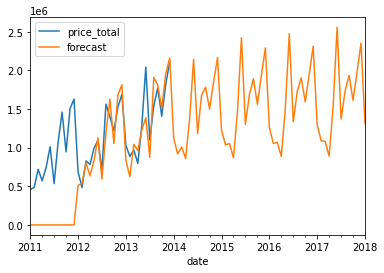

In [488]:
#plot data actual, predict and forecast
fig, ax = plt.subplots()
ax = data_train.plot(ax=ax)
plot_predict(model,'2011','2018',ax=ax,
             alpha=None, dynamic=False)
plt.show()

In [490]:
y_pred = pd.Series(autoModel.predict(12), index=data_test.price_total.index)
y_true = data_test.price_total
  
print(f'GMV Predict =\n', np.array(y_pred).astype(np.uint))
print(f'\nGMV True =\n', np.array(y_true))

GMV Predict =
 [1248064 1073710 1195818 1050034 1504117 2174664 1306093 1826589 1954629
 1645953 2017954 2303318]

GMV True =
 [1230117.66838  858251.73648 1245819.02878 1171706.22658 1334220.24374
 1995769.89286 1233009.14004 2218193.82728 2395032.70118 2128268.47404
 2686613.74864 2488809.66364]


In [491]:
from sklearn.metrics import mean_absolute_error as mae , mean_absolute_percentage_error as mape, mean_squared_error as mse
from math import sqrt

RMSE = sqrt(mse(y_true,y_pred))
MAE = mae(y_true,y_pred)
MAPE = mape(y_true,y_pred)
SMAPE = pmdarima.metrics.smape(y_true, y_pred)

print('RMSE\t: ',RMSE)
print('MAE\t: ',MAE)
print('MAPE\t: ',MAPE)
print('SMAPE\t: ',SMAPE/100)

RMSE	:  315133.2142594905
MAE	:  249618.954380795
MAPE	:  0.13302672372633892
SMAPE	:  0.13870690802029087
